In [1]:
"""
Exercise 1 - preprocessing. Removing the unnecessary columns and saving them for later plus loading dataframe
"""
import pandas as pd

baseDf = pd.read_csv('USCensus1990.data.csv')
externalVariablesArr = [baseDf.pop('dAge'), baseDf.pop('dHispanic'), baseDf.pop('iYearwrk'), baseDf.pop('iSex')]
baseDf.pop('caseid')

0            10000
1            10001
2            10002
3            10003
4            10004
            ...   
2458280    2468280
2458281    2468281
2458282    2468282
2458283    2468283
2458284    2468284
Name: caseid, Length: 2458285, dtype: int64

In [18]:
from sklearn.neighbors import NearestNeighbors # importing the library
import numpy as np
import pandas as pd
from sklearn import datasets
import dunnsklearn
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder  
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
size = 24000
encoder = OneHotEncoder()
testDf = encoder.fit_transform(baseDf.sample(size)).toarray()
neighb = NearestNeighbors(n_neighbors=128) # 2 * dimension
nbrs=neighb.fit(testDf) 
distances,indices=nbrs.kneighbors(testDf)


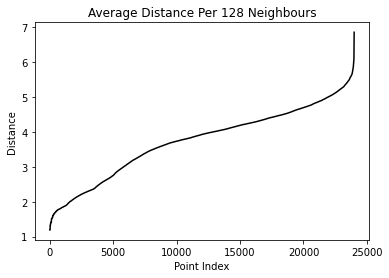

In [21]:
arr = []
for i in distances:
    arr.append(i.mean())
arr.sort()
plt.title("Average Distance Per 128 Neighbours")
plt.xlabel("Point Index")
plt.ylabel("Distance")
plt.plot(arr, color = "black", label="Average Distance")
plt.savefig('DBscan Eps Calculations.svg', format='svg', dpi=1200) # seems e=4

In [23]:
"""
Exercise 2 - Clustering the remaining columns and finding out which clustering method is king.
Before that, because data is categorial, we will use one hot encoding to make it continual.
For this exercise we will use gmm, kmeans, dbscan.
Because the database is massive, I'm unavailable often, and I have very little processing power, I've choosen to only use those 3 and calculate everything using a sample.
To determine which clustering dimension is best, we will use silleuhet score and david to determine the davies_bouldin_score.
Then we will compare the algorithms
"""
import numpy as np
import pandas as pd
from sklearn import datasets
import dunnsklearn
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder  
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
dbscanSilhouetteArr = []
dbscanDaviesBouldinArr = []
size = 24000
for i in range(0, 10):
    encoder = OneHotEncoder()
    testDf = encoder.fit_transform(baseDf.sample(size)).toarray()
    silhouetteArr = []
    daviesBouldinArr = []
    for j in range(0, 1):
        dbscan = DBSCAN(eps = 4, min_samples = 128)
        dbscan.fit(testDf)
        labels = dbscan.labels_
        daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
        silhouetteArr.append(metrics.silhouette_score(testDf, labels))
    dbscanSilhouetteArr.append(silhouetteArr)
    dbscanDaviesBouldinArr.append(daviesBouldinArr)

indexArr = [2]
averagedDbscanSilhouetteArr = []
averagedDbscanDaviesBouldinArr = []
for i in range(0, 1):
    averageScore = 0
    for j in range(0, 9):
        averageScore += dbscanSilhouetteArr[j][i]
    averagedDbscanSilhouetteArr.append(averageScore)
for i in range(0, 1):
    averageScore = 0
    for j in range(0, 9):
        averageScore += dbscanDaviesBouldinArr[j][i]
    averagedDbscanDaviesBouldinArr.append(averageScore)
fig, ax = plt.subplots()
plt.title("Silhouette Score Average DBscan")
plt.xlabel("Cluster count")
plt.ylabel("Score")
ax.plot(indexArr, averagedDbscanSilhouetteArr, color = "black", label="Silhouette Values")
plt.savefig('Silhouette Score Average DBscan.svg', format='svg', dpi=1200)
fig, ax = plt.subplots()
plt.title("DaviesBouldin Score Average DBscan")
plt.xlabel("Cluster count")
plt.ylabel("Score")
ax.plot(indexArr, averagedDbscanDaviesBouldinArr, color = "black", label="DaviesBouldin Values")
plt.savefig('DaviesBouldin Score Average DBScan.svg', format='svg', dpi=1200)

IndexError: list index out of range

In [48]:
"""
Part 2 - comparing algorithms.
We will take each algorithm with the given parameters we found and compare sillhouette scores between their clustering.
"""
encoder = OneHotEncoder()
testDf = encoder.fit_transform(baseDf.sample(size)).toarray()
silhouetteArr = []
daviesBouldinArr = []
for j in range(0, 10):
    dbscan = DBSCAN(eps = 4, min_samples = 128)
    dbscan.fit(testDf)
    firstLabels = dbscan.labels_
    daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
    silhouetteArr.append(metrics.silhouette_score(testDf, labels))
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(testDf)
    secondLabels = kmeans.labels_
    daviesBouldinArr.append([davies_bouldin_score(testDf, firstLabels), davies_bouldin_score(testDf, secondLabels)])
    silhouetteArr.append([metrics.silhouette_score(testDf, firstLabels), metrics.silhouette_score(testDf, secondLabels)])
dbScanAvg=0
kmeansAvg=0
for i in silhouetteArr[1::2]:
    dbScanAvg+=float(i[0])
    kmeansAvg+=float(i[1])
print('DBScan average silhouette score is: ', dbScanAvg/len(silhouetteArr), 'Kmeans average silhouette score is: ', kmeansAvg/len(silhouetteArr))
dbScanAvg=0
kmeansAvg=0
for i in daviesBouldinArr[1::2]:
    dbScanAvg+=float(i[0])
    kmeansAvg+=float(i[1])
print('DBScan average daviesBouldin score is: ', dbScanAvg/len(daviesBouldinArr), 'Kmeans average daviesBouldin score is: ', kmeansAvg/len(daviesBouldinArr))


DBScan average silhouette score is:  0.06478806470603828 Kmeans average silhouette score is:  0.1075198459901878
DBScan average daviesBouldin score is:  2.0684653055918063 Kmeans average daviesBouldin score is:  1.038766146546504


In [49]:
from sklearn.mixture import GaussianMixture

encoder = OneHotEncoder()
testDf = encoder.fit_transform(baseDf.sample(size)).toarray()
silhouetteArr = []
daviesBouldinArr = []
for j in range(0, 10):
    dbscan = DBSCAN(eps = 4, min_samples = 128)
    dbscan.fit(testDf)
    firstLabels = dbscan.labels_
    daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
    silhouetteArr.append(metrics.silhouette_score(testDf, labels))
    GMM = GaussianMixture(n_components=3)
    GMM.fit(testDf)
    secondLabels = GMM.predict(testDf)
    daviesBouldinArr.append([davies_bouldin_score(testDf, firstLabels), davies_bouldin_score(testDf, secondLabels)])
    silhouetteArr.append([metrics.silhouette_score(testDf, firstLabels), metrics.silhouette_score(testDf, secondLabels)])
dbScanAvg=0
kmeansAvg=0
for i in silhouetteArr[1::2]:
    dbScanAvg+=float(i[0])
    kmeansAvg+=float(i[1])
print('DBScan average silhouette score is: ', dbScanAvg/len(silhouetteArr), 'GMM average silhouette score is: ', kmeansAvg/len(silhouetteArr))
dbScanAvg=0
kmeansAvg=0
for i in daviesBouldinArr[1::2]:
    dbScanAvg+=float(i[0])
    kmeansAvg+=float(i[1])
print('DBScan average daviesBouldin score is: ', dbScanAvg/len(daviesBouldinArr), 'GMM average daviesBouldin score is: ', kmeansAvg/len(daviesBouldinArr))


DBScan average silhouette score is:  0.06465005452522213 GMM average silhouette score is:  0.11361869071056527
DBScan average daviesBouldin score is:  2.083818711230379 GMM average daviesBouldin score is:  0.9403486957627182


In [47]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 5610
